In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns
sns.set_palette("Set2")



In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('./Dataset-Mental-Disorders.csv')
df['Expert Diagnose'] = df['Expert Diagnose'].replace('Depression', 'Bipolar Type-2')
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Bipolar Type-2
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [5]:
df.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,2,2,2,2,2,2,2,2,2,9,8,9,3
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,62


In [6]:
df['Expert Diagnose'].value_counts()

Bipolar Type-2    62
Normal            30
Bipolar Type-1    28
Name: Expert Diagnose, dtype: int64

In [7]:
df['Suicidal thoughts'].value_counts()

NO     63
YES    57
Name: Suicidal thoughts, dtype: int64

In [8]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', "YES")

In [9]:
df['Suicidal thoughts'].value_counts()

NO     63
YES    57
Name: Suicidal thoughts, dtype: int64

In [10]:
df['Sadness'].value_counts()

Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: Sadness, dtype: int64

In [11]:
df['Euphoric'].value_counts()

Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: Euphoric, dtype: int64

In [12]:
df['Sexual Activity'].value_counts()

5 From 10    22
4 From 10    20
3 From 10    17
6 From 10    15
2 From 10    15
7 From 10    14
8 From 10    11
1 From 10     4
9 From 10     2
Name: Sexual Activity, dtype: int64

In [13]:
df['Optimisim'].value_counts()

6 From 10    21
5 From 10    20
4 From 10    19
2 From 10    18
3 From 10    18
7 From 10     8
8 From 10     8
1 From 10     6
9 From 10     2
Name: Optimisim, dtype: int64

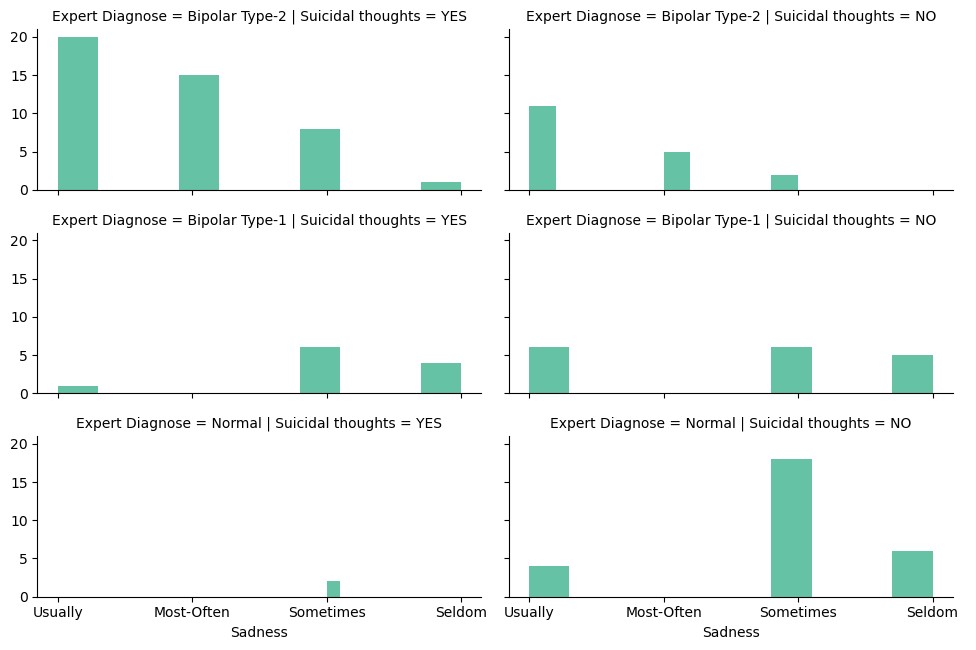

In [14]:
grid = sns.FacetGrid(df, col='Suicidal thoughts', row='Expert Diagnose', height=2.2, aspect=2.2)
grid.map(plt.hist, 'Sadness')
grid.add_legend()

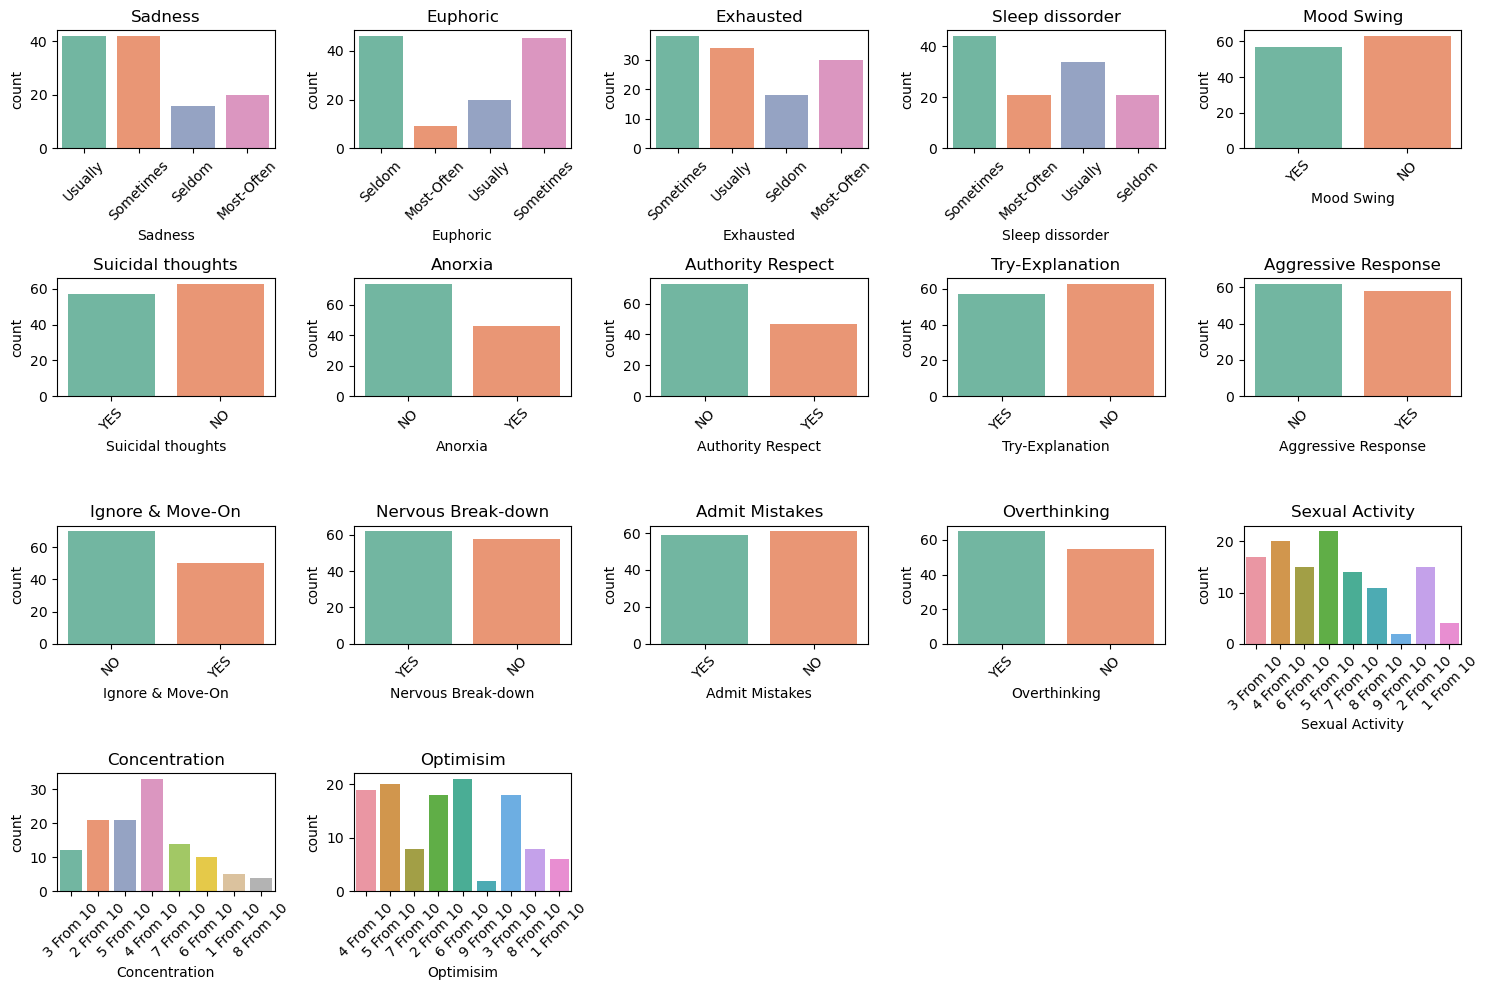

In [15]:

symptoms = df.drop(columns=['Patient Number', 'Expert Diagnose'])

plt.figure(figsize=(15, 10))
for i, symptom in enumerate(symptoms.columns):
    plt.subplot(4, 5, i + 1)
    sns.countplot(x=symptom, data=df)
    plt.title(symptom)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
df = df.drop('Patient Number', axis=1)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Bipolar Type-2
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [17]:
df['Expert Diagnose'] = df['Expert Diagnose'].map({'Normal': 0, 
                                                   'Bipolar Type-1': 1,
                                                  'Bipolar Type-2': 2}).astype(int)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,2
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [18]:
yes_no_cols = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
frequency_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
from_columns = ['Sexual Activity', 'Concentration', 'Optimisim']

for col in yes_no_cols:
    df[col] = df[col].map({'YES': 1, 'NO': 0}).astype(int)

for col in frequency_columns:
    df[col] = df[col].map({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}).astype(int)

for col in from_columns:
    df[col] = df[col].astype(str).str.extract('(\d)')
    df[col] = pd.to_numeric(df[col])


In [19]:
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,2
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [20]:
X = df.drop(columns=['Expert Diagnose'],axis=1)
y = df['Expert Diagnose']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_train.shape

(96, 17)

In [23]:
y_train.shape

(96,)

In [24]:
X_test.shape

(24, 17)

In [25]:
y_test.shape

(24,)

In [26]:
X_train.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
42,0,1,1,0,1,0,0,1,0,0,1,0,1,1,4,4,6
12,3,1,3,2,1,1,1,0,1,1,0,1,0,1,9,2,4
15,1,1,1,1,1,0,1,0,1,1,0,0,0,1,6,4,6
114,0,1,0,2,0,0,0,0,0,1,0,0,0,0,5,8,7
76,2,1,0,0,0,0,1,0,0,1,0,0,0,1,8,2,8


In [27]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


In [40]:
logreg_param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'fit_intercept': [True, False],
}

logreg = LogisticRegression()
grid_search_logreg = GridSearchCV(estimator = logreg, param_grid = logreg_param_grid)
grid_search_logreg.fit(X_train_encoded, y_train)
y_pred_optimized_logreg = grid_search_logreg.best_estimator_.predict(X_test_encoded)
print(accuracy_score(y_test, y_pred_optimized_logreg))


d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anacond

0.875


d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anacond

In [41]:
print(classification_report(y_test, y_pred_optimized_logreg, target_names=['Normal', 'Bipolar Type-1', 'Bipolar Type-2']))

                precision    recall  f1-score   support

        Normal       1.00      0.71      0.83         7
Bipolar Type-1       0.75      0.75      0.75         4
Bipolar Type-2       0.87      1.00      0.93        13

      accuracy                           0.88        24
     macro avg       0.87      0.82      0.84        24
  weighted avg       0.89      0.88      0.87        24



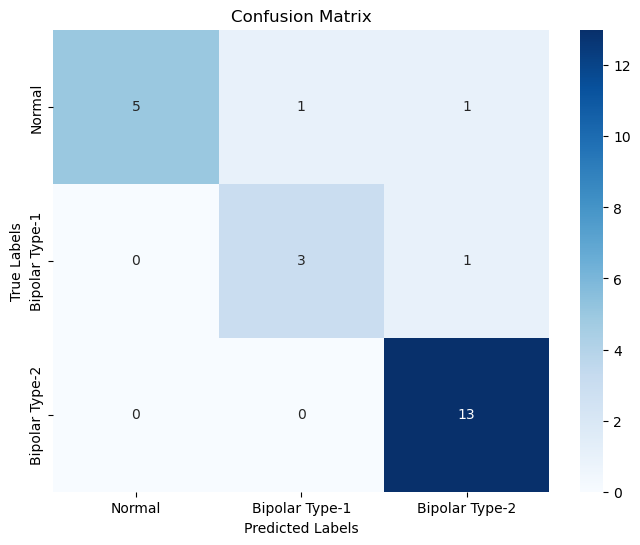

In [42]:
cm = confusion_matrix(y_test, y_pred_optimized_logreg)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])
ax.yaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])

plt.show()

In [ ]:
rf_param_grid = {
    'n_estimators': [150, 250, 500],
    'max_depth': [None, 30, 60],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 13, 20]
}
rf = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param_grid)
grid_search_rf.fit(X_train, y_train)
best_params = grid_search_rf.best_params_
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state = 42)
optimized_rf_classifier.fit(X_train, y_train)
y_pred_rf = optimized_rf_classifier.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
accuracy_rf

0.8333333333333334

In [ ]:
print(classification_report(y_test, y_pred_rf, target_names=['Normal', 'Bipolar Type-1', 'Bipolar Type-2']))

                precision    recall  f1-score   support

        Normal       0.83      0.71      0.77         7
Bipolar Type-1       0.75      0.75      0.75         4
Bipolar Type-2       0.86      0.92      0.89        13

      accuracy                           0.83        24
     macro avg       0.81      0.80      0.80        24
  weighted avg       0.83      0.83      0.83        24



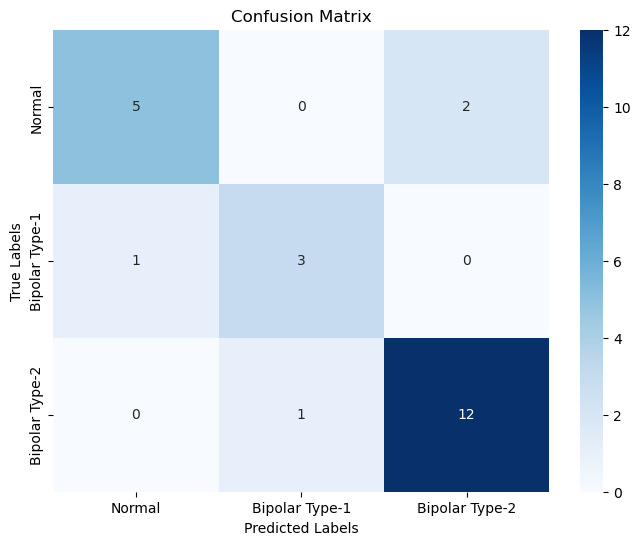

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])
ax.yaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])

plt.show()

In [ ]:
svm_param_grid = {
'C': [0.1, 1, 10],                   
'kernel': ['linear', 'rbf', 'poly'],
'gamma': ['scale', 'auto'],          
'degree': [2, 3, 4],                 
}     
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator = svm, param_grid = svm_param_grid)

grid_search_svm.fit(X_train, y_train)

grid_search_svm.best_estimator_.fit(X_train, y_train)

y_pred_test_svm = grid_search_svm.best_estimator_.predict(X_test)

print(accuracy_score(y_test, y_pred_test_svm))
print(grid_search_svm.best_params_)

0.8333333333333334
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
print(classification_report(y_test, y_pred_test_svm, target_names=['Normal', 'Bipolar Type-1', 'Bipolar Type-2']))

                precision    recall  f1-score   support

        Normal       0.86      0.86      0.86         7
Bipolar Type-1       0.67      0.50      0.57         4
Bipolar Type-2       0.86      0.92      0.89        13

      accuracy                           0.83        24
     macro avg       0.79      0.76      0.77        24
  weighted avg       0.83      0.83      0.83        24



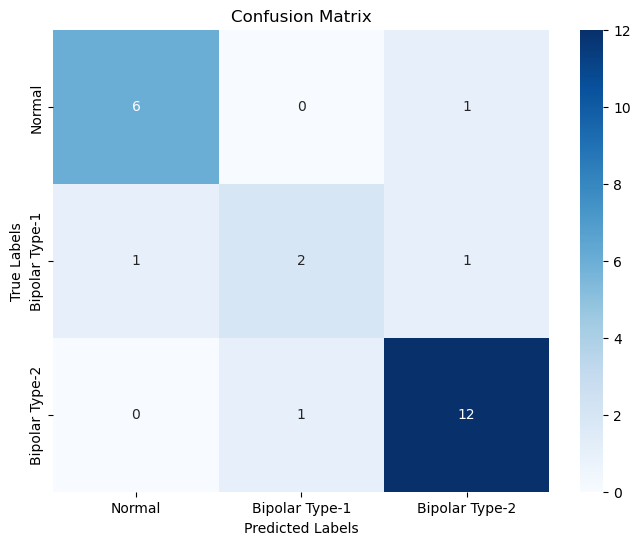

In [ ]:
cm = confusion_matrix(y_test, y_pred_test_svm)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])
ax.yaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])

plt.show()

In [ ]:
# Given data
data = {
    'Sadness': ['Seldom'],
    'Euphoric': ['Usually'],
    'Exhausted': ['Usually'],
    'Sleep dissorder': ['Seldom'],
    'Mood Swing': [0],
    'Suicidal thoughts': [0],
    'Anorxia': [0],
    'Authority Respect': [1],
    'Try-Explanation': [1],
    'Aggressive Response': [0],
    'Ignore & Move-On': [1],
    'Nervous Break-down': [0],
    'Admit Mistakes': [1],
    'Overthinking': [0],
    'Sexual Activity': ['8 From 10'],
    'Concentration': ['9 From 10'],
    'Optimisim': ['10 From 10']
}

# Create a DataFrame
dummy_df = pd.DataFrame(data)

test_encoded = encoder.transform(dummy_df)
classes = ['Normal', 'Bipolar Type-1', 'Bipolar Type-2']

In [ ]:
result_1 = classes[grid_search_logreg.best_estimator_.predict(test_encoded)[0]]
# result_2 = classes[grid_search_rf.best_estimator_.predict(test_encoded)[0]]
# result_3 = classes[optimized_rf_classifier.predict(test_encoded)[0]]

In [ ]:
print(result_1)
# print(result_2)
# print(result_3)

Normal


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import numpy as np

In [ ]:
np.random.seed(42)
voting_clf = VotingClassifier(estimators=[('logreg', grid_search_logreg.best_estimator_), ('svm', grid_search_svm.best_estimator_)], voting='hard')
voting_clf.fit(X_train_encoded, y_train)
y_pred_voting_clf = voting_clf.predict(X_test_encoded)
# accuracy = voting_clf.score(X_test_encoded, y_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_voting_clf))

Ensemble Model Accuracy: 0.8333333333333334


d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [ ]:
print(classification_report(y_test, y_pred_voting_clf, target_names=['Normal', 'Bipolar Type-1', 'Bipolar Type-2']))

                precision    recall  f1-score   support

        Normal       0.83      0.71      0.77         7
Bipolar Type-1       1.00      0.50      0.67         4
Bipolar Type-2       0.81      1.00      0.90        13

      accuracy                           0.83        24
     macro avg       0.88      0.74      0.78        24
  weighted avg       0.85      0.83      0.82        24



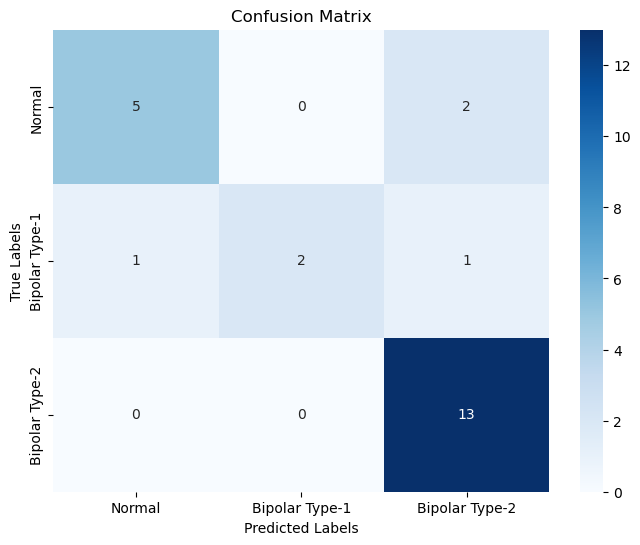

In [ ]:
cm = confusion_matrix(y_test, y_pred_voting_clf)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])
ax.yaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])

plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_clf, X_test_encoded, y_test, cv=KFold(n_splits=5, random_state=42, shuffle=True))
print(scores)


[0.4  0.4  0.8  0.8  0.75]


d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [ ]:
np.random.seed(42)
base_models = [
    ('logreg', grid_search_logreg.best_estimator_), 
    ('randomforest', grid_search_rf.best_estimator_), 
    ('svm', grid_search_svm.best_estimator_)
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model,)

# Fit stacking classifier to the training data
stacking_clf.fit(X_train_encoded, y_train)

# Evaluate the stacking classifier
accuracy = stacking_clf.score(X_test_encoded, y_test)
y_pred_sc = stacking_clf.predict(X_test_encoded)
print("Stacking Classifier Accuracy:", accuracy)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Stacking Classifier Accuracy: 0.8333333333333334


In [ ]:
scores = cross_val_score(stacking_clf, X_test_encoded, y_test, cv= KFold(n_splits=5, random_state=42, shuffle=True))
print(scores)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.

[0.4 0.4 0.4 0.8 0.5]


d:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


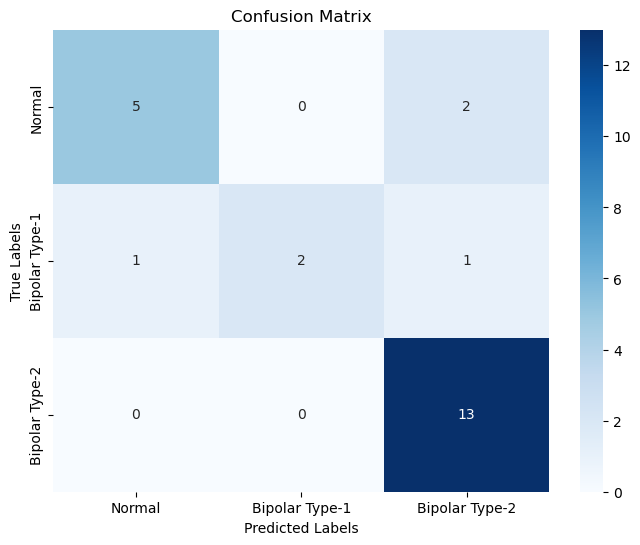

In [ ]:
cm = confusion_matrix(y_test, y_pred_sc)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])
ax.yaxis.set_ticklabels(['Normal', 'Bipolar Type-1', 'Bipolar Type-2'])

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_sc, target_names=['Normal', 'Bipolar Type-1', 'Bipolar Type-2']))

                precision    recall  f1-score   support

        Normal       0.83      0.71      0.77         7
Bipolar Type-1       1.00      0.50      0.67         4
Bipolar Type-2       0.81      1.00      0.90        13

      accuracy                           0.83        24
     macro avg       0.88      0.74      0.78        24
  weighted avg       0.85      0.83      0.82        24



In [ ]:
result_1 = classes[voting_clf.predict(test_encoded)[0]]
print(result_1)

Normal


In [ ]:
result_1 = classes[stacking_clf.predict(test_encoded)[0]]
print(result_1)

Normal
